> Inteligencia Computacional

#**APRENDISAJE NO SUPERVISADO:** DETECCIÓN DE ANOMALÍAS
---

**SEMESTRE:** VIII **GRUPO:** B

**ESTUDIANTES:** 
*   Nelson Yoel Phuño Cahuana          **- 170013**
*   Daysi Saimira Machaca Condori      **- 161989**


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (16.0, 6.0)

Cargar los datos 

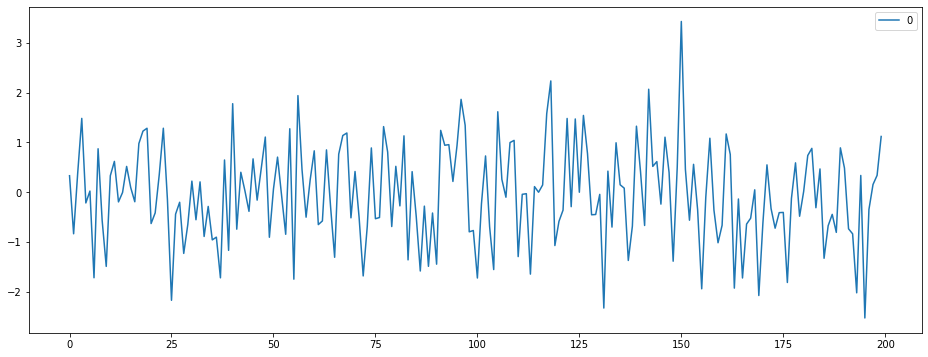

In [ ]:
data =pd.DataFrame(np.random.randn(200))
data.plot()

data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b7721eba8>]],
      dtype=object)

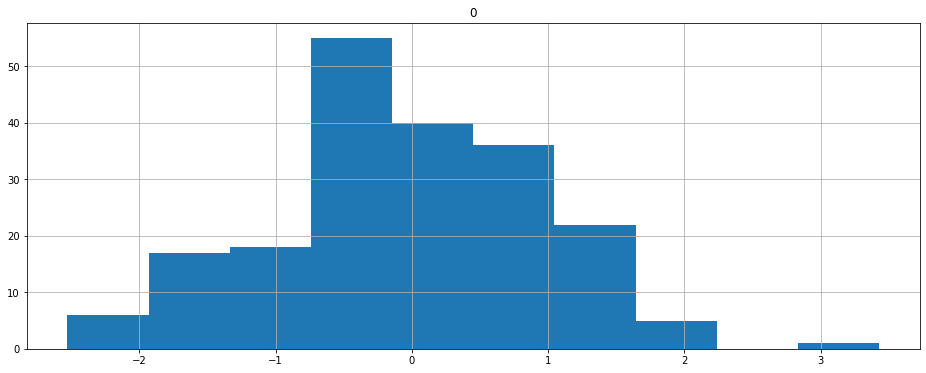

In [ ]:
data.hist()

0    0.991112
dtype: float64

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler


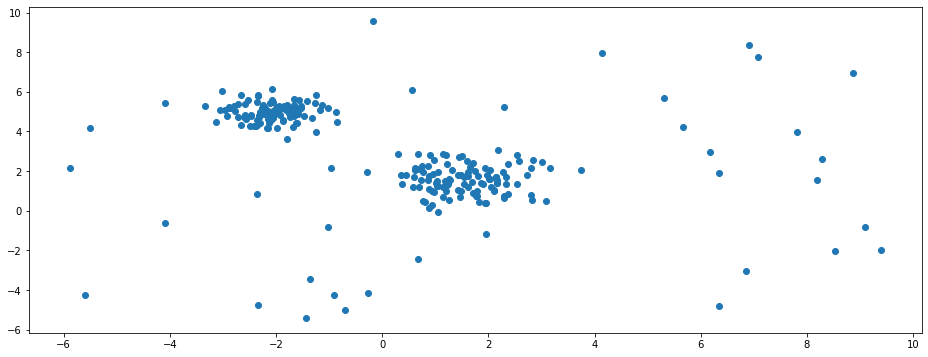

In [ ]:
df= pd.read_csv('data_set_A.csv')
df.head()
x=df.values
plt.scatter(x[:,0],x[:,1])


In [ ]:
clf=IsolationForest(contamination=.1)
clf.fit(x)
predictions = clf.predict(x)

In [ ]:
(predictions<0).mean()

0.1

In [ ]:
abn_ind=np.where(predictions <0)

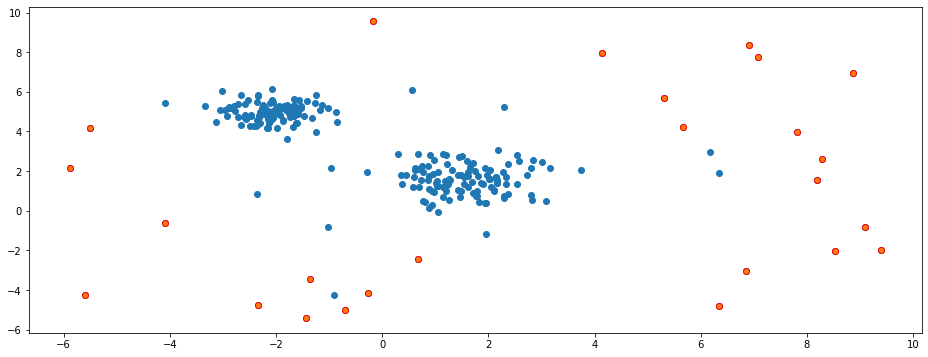

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[abn_ind,0], x[abn_ind,1], edgecolors="r")

In [ ]:
df_sen = pd.read_csv('sensors.csv', index_col='time')
df_sen.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [ ]:
df_sen.index = pd.to_datetime(df_sen.index)
type(df_sen.index)

pandas.core.indexes.datetimes.DatetimeIndex

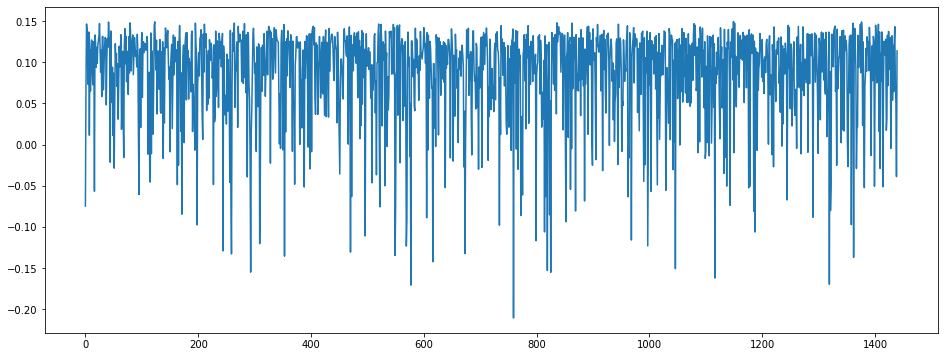

In [ ]:
x=df_sen.values
clf= IsolationForest(contamination=.1)
predictions= clf.fit_predict(x)
dec_fun = clf.decision_function(x)
plt.plot(dec_fun)

In [ ]:
df_sen['health']= dec_fun
df_sen.head()


,sensor1,sensor2,sensor3,health
time,,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405,-0.074662
2020-04-01 00:01:00,2.258430,1.054156,11.453157,0.070119
2020-04-01 00:02:00,4.834818,0.284641,10.082687,0.146376
2020-04-01 00:03:00,5.058023,0.845871,9.870637,0.138982
2020-04-01 00:04:00,6.888020,-2.019289,9.265985,0.097269


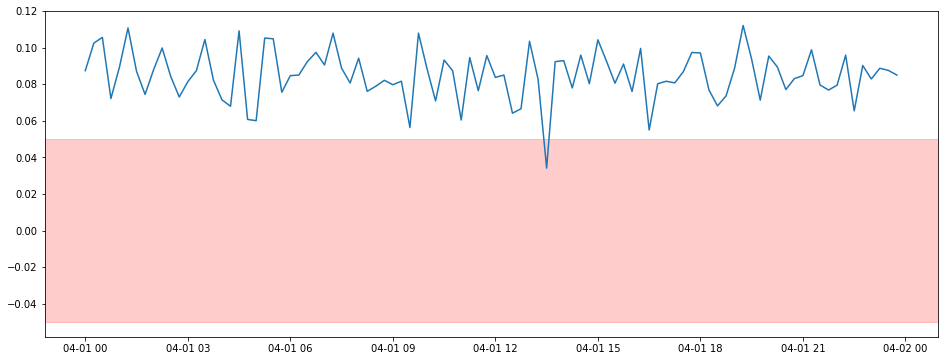

In [ ]:
plt.plot(df_sen['health'].resample('15T').mean())
plt.axhspan(-.05, .05, alpha =0.2, color ='red')